# Flight Delay Cause
##### In the realm of aviation analytics, understanding and mitigating flight delays is paramount for ensuring operational efficiency and passenger satisfaction. This project delves into the intricate world of flight delays, exploring the contributing factors and their impact on different airlines. By leveraging a comprehensive dataset encompassing a range of delay categories such as Carrier Delay, Late Aircraft Delay, NAS Delay, and Weather Delay, we aim to unravel patterns, trends, and insights that can inform strategic decision-making within the aviation industry.

## 1. Understanding and cleaning dataset
## 2. EDA analysis on delay by time period / delay by airlines / delay by causes
## 3. Correlation
## 4. Regression

## This dataset is composed by the following variables: 

1.	**Year**	2008
2.	**Month**	1-12
3.	**DayofMonth**	1-31
4.	**DayOfWeek**	1 (Monday) - 7 (Sunday)
5.	**DepTime**	actual departure time (local, hhmm)
6.	**CRSDepTime**	scheduled departure time (local, hhmm)
7.	**ArrTime**	actual arrival time (local, hhmm)
8.	**CRSArrTime**	scheduled arrival time (local, hhmm)
9.	**UniqueCarrier**	unique carrier code
10.	**FlightNum**	flight number
11.	**TailNum** plane tail number: aircraft registration, unique aircraft identifier
12.	**ActualElapsedTime**	in minutes
13.	**CRSElapsedTime**	in minutes
14.	**AirTime**	in minutes
15.	**ArrDelay**	arrival delay, in minutes: **A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).** 
16.	**DepDelay**	departure delay, in minutes
17.	**Origin**	origin IATA airport code
18.	**Dest**	destination IATA airport code
19.	**Distance**	in miles
20.	**TaxiIn**	taxi in time, in minutes
21.	**TaxiOut**	taxi out time in minutes
22.	**Cancelled**	*was the flight cancelled
23.	**CancellationCode**	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	**Diverted**	1 = yes, 0 = no
25.	**CarrierDelay**	in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26.	**WeatherDelay**	in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27.	**NASDelay**	in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. 
28.	**SecurityDelay**	in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29.	**LateAircraftDelay**	in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

# 1. Understanding and cleaning data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

In [4]:
import os  

In [5]:
os.chdir("C:\\Users\\davki\\OneDrive\\Data Study")
print(os.getcwd())

C:\Users\davki\OneDrive\Data Study


In [6]:
aviation = pd.read_csv('Aviation Delay\\DelayedFlights.csv')
airline_list = pd.read_csv('Aviation Delay\\airlines.csv')
print(aviation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

#### 1. Airline name and Columns
    Airline codes and long legal name makes data hard to read. Names will be truncated into new column "airline" and original codes will be dropped
#### 2. Departure date is divided into three different columns: Year, Month and Day of Month.
    DepartureDate column will replace it and other columns that represents the date will be dropped.
#### 3.  13 columns contain N/A cells.
    ArrTime : It is missing the value if airplane is cancelled or diverted.
    After removing cancelled and diverted flight records, all missing values are removed except for Delay minute columns
#### 4. Customers tends to understand when flight is delayed less than 20 minutes.
    Threshold for customers to perceive that their flight is delayed or not is about 20 minutes.
    We 


In [7]:
print(airline_list)

   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


In [8]:
replace_dict = {"Airlines": "Air", "Air Lines": "Air","Inc.":"","Co.":""}
airline_list["AIRLINE"] = airline_list["AIRLINE"].replace(replace_dict, regex=True)

In [9]:
unique_carriers_aviation = aviation['UniqueCarrier'].unique()


# Find airline codes in aviation that are not in airline_list
missing_airline_codes = unique_carriers_aviation[~pd.Series(unique_carriers_aviation).isin(airline_list["IATA_CODE"])]

print(missing_airline_codes)

['XE' 'YV' 'OH' 'FL' 'NW' '9E' 'AQ' 'CO']


In [10]:
# Information about the new airlines
new_airlines_info = pd.DataFrame({
    'IATA_CODE': ['XE', 'YV', 'OH', 'FL', 'NW', '9E', 'AQ', 'CO'],
    'AIRLINE': ['ExpressJet Air', 'Mesa Air', 'PSA Air', 'AirTran Air', 'Northwest Air', 'Endeavor Air', 'Aloha Air', 'Continental Air']
})

# Append the new airlines to the existing DataFrame
airline_list = pd.concat([airline_list, new_airlines_info], ignore_index=True)


In [11]:
aviation_merged = pd.merge(aviation, airline_list, left_on='UniqueCarrier', right_on='IATA_CODE', how='left')

In [12]:
aviation_merged['DepatureDate'] = pd.to_datetime(aviation_merged.Year*10000+aviation_merged.Month*100+aviation_merged.DayofMonth,format='%Y%m%d')

In [13]:
aviation_merged.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'IATA_CODE', 'AIRLINE', 'DepatureDate'],
      dtype='object')

In [14]:
print(aviation_merged.head())

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  CancellationCode Diverted  \
0   2211.0        2225            WN  ...                 N        0   
1   1002.0        1000            WN  ...                 N        0   
2    804.0         750            WN  ...                 N        0   
3   1959.0        1925            WN  ...                 N        0   
4   2121.0        2110            WN  ...                 N        0   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           NaN           NaN       NaN      

In [15]:
aviation_merged = aviation_merged.drop(["UniqueCarrier", "Year","Month", "IATA_CODE","Unnamed: 0", "DayofMonth","DayOfWeek","FlightNum","TailNum","ActualElapsedTime","CRSElapsedTime",], axis=1)

In [16]:
aviation_merged.isna().sum()

DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
AIRLINE                   0
DepatureDate              0
dtype: int64

In [17]:
print(aviation_merged[aviation_merged["ArrTime"].isna()][['Cancelled','Diverted']].drop_duplicates())
aviation_merged = aviation_merged[(aviation_merged["Cancelled"] == 0) & (aviation_merged["Diverted"] == 0)]

         Cancelled  Diverted
1280             0         1
1542406          1         0


In [18]:
aviation_merged = aviation_merged.drop(["Cancelled", "CancellationCode","Diverted"], axis=1)
aviation_merged.isna().sum().sort_values(ascending=False)

LateAircraftDelay    680883
SecurityDelay        680883
NASDelay             680883
WeatherDelay         680883
CarrierDelay         680883
DepTime                   0
TaxiIn                    0
AIRLINE                   0
TaxiOut                   0
Distance                  0
CRSDepTime                0
Dest                      0
Origin                    0
DepDelay                  0
ArrDelay                  0
AirTime                   0
CRSArrTime                0
ArrTime                   0
DepatureDate              0
dtype: int64

In [19]:
def check(df):
    print("  Shape  ".center(50, "#"))
    print(df.shape)
    print("\n")
    print("  Types  ".center(50, "#"))
    print(df.dtypes)
    print("\n")
    print("  Head  ".center(50, "#"))
    print(df.head())
    print("\n")
    print("  Tail  ".center(50, "#"))
    print(df.tail())
    print("\n")
    print("  Nan  ".center(50, "#"))
    print(df.isnull().sum())
    print("\n")
    print("  Quantiles  ".center(50, "#"))
    numeric_columns = df.select_dtypes(include=[np.number]) 
    print(numeric_columns.quantile([0, 0.05, 0.5, 0.95, 1]).T)
check(aviation_merged)

####################  Shape  #####################
(1928371, 19)


####################  Types  #####################
DepTime                     float64
CRSDepTime                    int64
ArrTime                     float64
CRSArrTime                    int64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                      float64
TaxiOut                     float64
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               float64
LateAircraftDelay           float64
AIRLINE                      object
DepatureDate         datetime64[ns]
dtype: object


#####################  Head  #####################
   DepTime  CRSDepTime  ArrTime  CRSArrTime  AirTime  ArrDelay  DepDelay  \
0   2003.0        1955   2211.0        2225    116.0   

In [20]:
aviation_merged['ArrDelayCategory'] = np.select(
    [aviation_merged['ArrDelay'] < 0, 
     (aviation_merged['ArrDelay'] > 0) & (aviation_merged['ArrDelay'] <= 20), 
     (aviation_merged['ArrDelay'] > 20) & (aviation_merged['ArrDelay'] <= 60), 
     aviation_merged['ArrDelay'] > 60],
    [0, 1, 2, 3],
    default=0
)

print(aviation_merged)

         DepTime  CRSDepTime  ArrTime  CRSArrTime  AirTime  ArrDelay  \
0         2003.0        1955   2211.0        2225    116.0     -14.0   
1          754.0         735   1002.0        1000    113.0       2.0   
2          628.0         620    804.0         750     76.0      14.0   
3         1829.0        1755   1959.0        1925     77.0      34.0   
4         1940.0        1915   2121.0        2110     87.0      11.0   
...          ...         ...      ...         ...      ...       ...   
1936753   1250.0        1220   1617.0        1552    120.0      25.0   
1936754    657.0         600    904.0         749     78.0      75.0   
1936755   1007.0         847   1149.0        1010    122.0      99.0   
1936756   1251.0        1240   1446.0        1437     89.0       9.0   
1936757   1110.0        1103   1413.0        1418    104.0      -5.0   

         DepDelay Origin Dest  Distance  TaxiIn  TaxiOut  CarrierDelay  \
0             8.0    IAD  TPA       810     4.0      8.0     

#### Delay flights by Time

Number of flights in 2008: 1,928,371
Number of flight on time: 861,963
Number of flights delayed more than 20 minutes: 1,066,408  

55.30% of flights experienced a delay.

In 2008, there were a total of 1,928,371 recorded flight instances. Among them, only 44.70%, or 861,963 flights, arrived on time, as defined by a delay of less than 20 minutes.

Passengers on board 1,066,408 flights experienced delays exceeding 20 minutes. Within this category, 627,233 flights, or approximately 58.8%, encountered delays ranging from 20 to 60 minutes, while the remaining flights experienced delays exceeding 60 minutes.


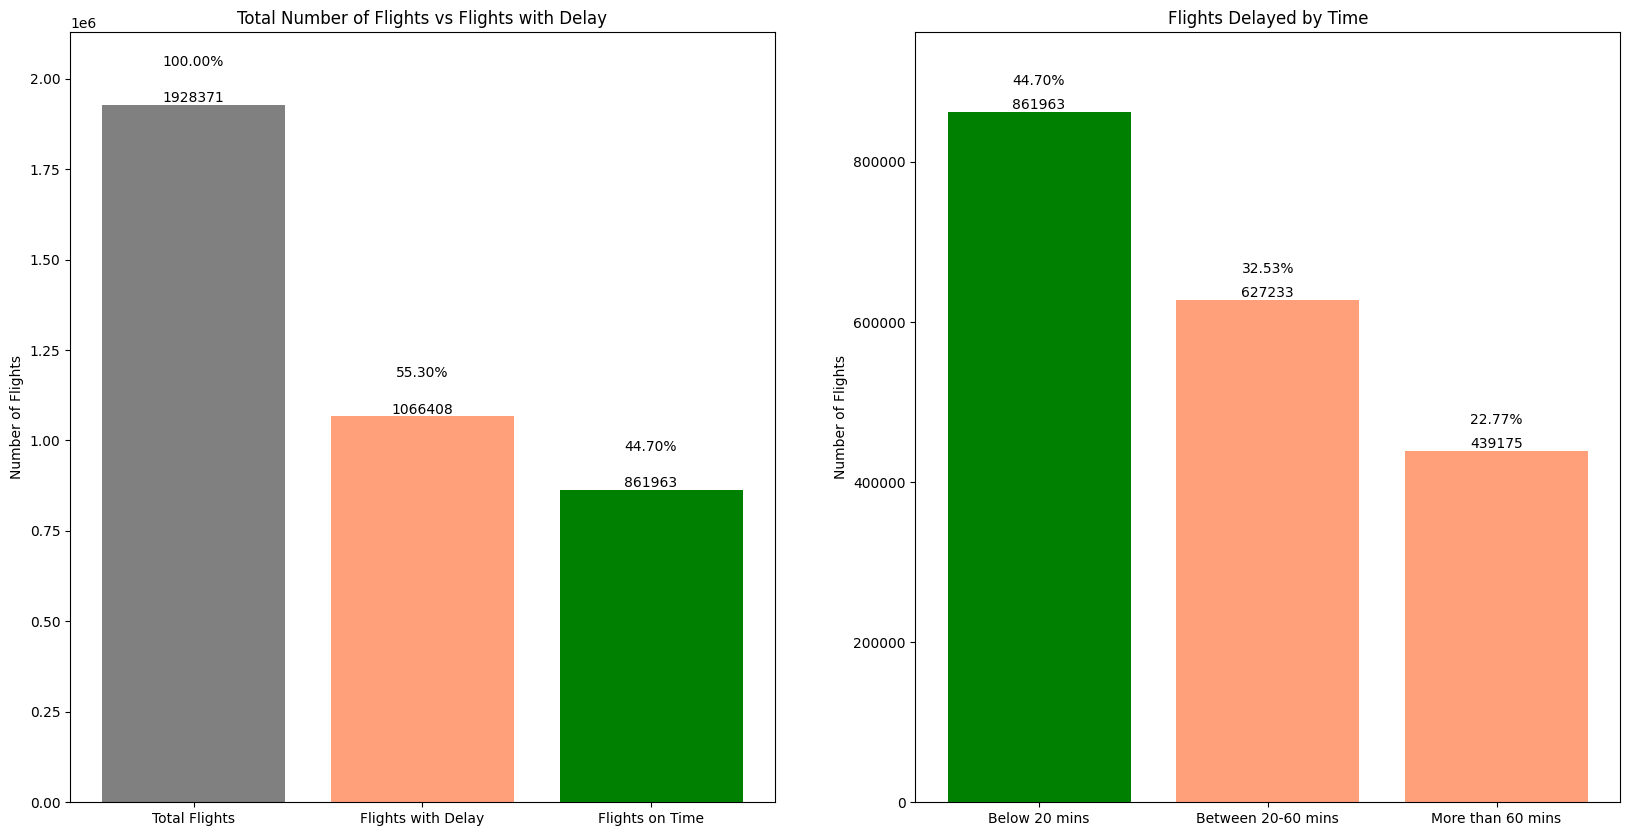

In [21]:
total_num = len(aviation_merged)
count_rows = len(aviation_merged[aviation_merged['ArrDelayCategory'] > 1])
filtered_len = len(aviation_merged[aviation_merged['ArrDelayCategory'] > 0])

values2 = [
    len(aviation_merged[aviation_merged['ArrDelayCategory'] < 2]),
    len(aviation_merged[aviation_merged['ArrDelayCategory'] == 2]),
    len(aviation_merged[aviation_merged['ArrDelayCategory'] == 3])
]

percentage_delayed = (count_rows / total_num) * 100

# Create a bar graph with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first bar graph for total flights
bars = axs[0].bar(['Total Flights', 'Flights with Delay', 'Flights on Time'], [total_num, count_rows, total_num - count_rows], color=['grey', '#FFA07A', 'green'])

# Annotate bars with their respective values and percentages
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 100000, f'{(yval / total_num) * 100:.2f}%', ha='center', va='bottom')

# Increase ylim for the first subplot
axs[0].set_ylim(0, total_num + 200000)
axs[0].set_ylabel('Number of Flights')
axs[0].set_title('Total Number of Flights vs Flights with Delay')

# Plot the second bar graph for delays category
bars2 = axs[1].bar(['Below 20 mins', 'Between 20-60 mins', 'More than 60 mins'], values2,color=['green','#FFA07A','#FFA07A'])

# Annotate bars with their respective values
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval + 30000, f'{(yval / total_num) * 100:.2f}%', ha='center', va='bottom')

axs[1].set_ylim(0, max(values2) + 100000)
axs[1].set_ylabel('Number of Flights')
axs[1].set_title('Flights Delayed by Time')

plt.show()


In [22]:
aviation_pivot = pd.pivot_table(aviation_merged, index='AIRLINE', columns='ArrDelayCategory', aggfunc='size', fill_value=0)

# Rename the columns for clarity
aviation_pivot.columns = ['Cat0','Cat1', 'Cat2', 'Cat3']

# Reset the index to make 'AIRLINE' a regular column
aviation_pivot.reset_index(inplace=True)

flights_per_airline = pd.merge(total_flights_per_airline,delayed_flights_per_airline,how='left',on="AIRLINE")
flights_per_airline = pd.merge(flights_per_airline,aviation_pivot,how='left',on="AIRLINE")
flights_per_airline["delay_rate"] = flights_per_airline["count_y"]/(flights_per_airline["count_y"].sum())
flights_per_airline["delay_rate_airline_>20"] = flights_per_airline["count_y"]/flights_per_airline["count_x"]
flights_per_airline["Cat2_rate"] = (flights_per_airline["Cat2"])/flights_per_airline["count_y"]
flights_per_airline["Cat3_rate"] = (flights_per_airline["Cat3"])/flights_per_airline["count_y"]
print(flights_per_airline)

NameError: name 'total_flights_per_airline' is not defined

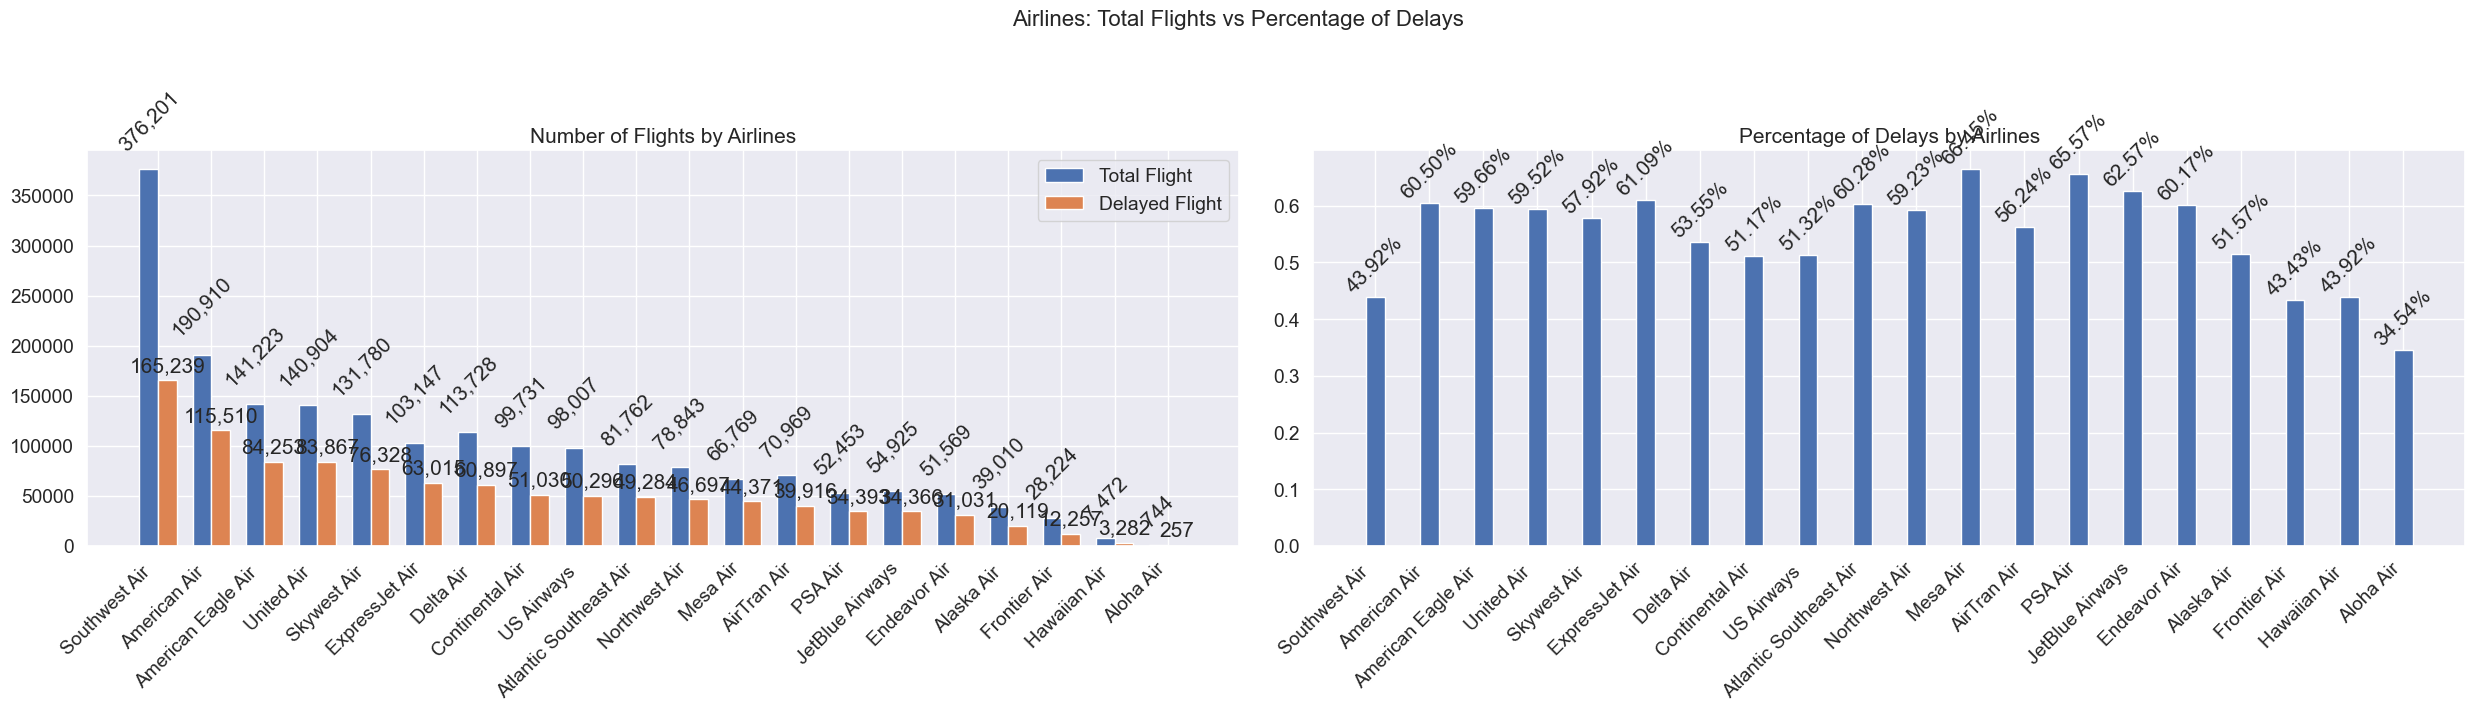

In [ ]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(25, 7))

# Sort the DataFrame by the sum of categories 2 and 3
flights_per_airline_sorted = flights_per_airline.sort_values(by=['count_y'], ascending=False)

# Plot the bar chart for the total number of flights by Airlines
bar_width = 0.35
index = np.arange(len(flights_per_airline_sorted))

bars1 = axs[0].bar(index, flights_per_airline_sorted["count_x"], width=bar_width, label='Total Flight')
bars2 = axs[0].bar(index + bar_width, flights_per_airline_sorted["count_y"], width=bar_width, label='Delayed Flight')

axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(flights_per_airline_sorted["AIRLINE"], rotation=45, ha="right")

# Annotate the bars with the exact number of flights
for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 15000, f'{yval:,.0f}', ha='center', va='bottom', rotation=45)

for bar in bars2:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 5000, f'{yval:,.0f}', ha='center', va='bottom')

axs[0].set_title("Number of Flights by Airlines")
axs[0].legend()

# Plot the bar chart for the percentage of delays by Airlines
bars3 = axs[1].bar(index, flights_per_airline_sorted["delay_rate_airline_>20"], width=bar_width)

axs[1].set_xticks(index)
axs[1].set_xticklabels(flights_per_airline_sorted["AIRLINE"], rotation=45, ha="right")

# Annotate the bars with percentages
for bar in bars3:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f'{yval:.2%}', ha='center', va='bottom', rotation=45)

axs[1].set_title("Percentage of Delays by Airlines")

# Add a common subtitle
fig.suptitle('Airlines: Total Flights vs Percentage of Delays', fontsize=16, y=1.02)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.show()


#### Delay by Airlines
Our initial hypothesis suggests that low-cost airlines might experience higher delay incidents compared to major carriers such as United Air, Delta Air, or American Air.
Examining the total number of delayed flights, Southwest, American Air, American Eagle Air, and United Air emerged as the top four, with 165,239, 115,510, 84,253, and 83,867 delays respectively.

However, when considering the total number of flights and calculating the delay ratio based on their total flights, the top four airlines with the highest delays are now Mesa Air(66.5%), PSA Air(65.5%), JetBlue Air(62.6%), and ExpressJet Air(61.09%).

By normalizing the data, we gain a more accurate understanding of airlines with the highest frequency of delay incidents, allowing for a more comprehensive analysis of their operational efficiency.

#### Cause of Delay
There are four columns that exhibit a correlation greater than 0.5 with Arrival Delay in minutes: Departure Delay, Late Aircraft Delay, Carrier Delay, and NAS Delay.
This correlation is evident, as a delay in departure can trigger a chain reaction of delays, often attributed to issues such as late aircraft arrival, carrier-related delays, or delays in the National Airspace System (NAS).

The primary cause of delays was identified as Late Aircraft, ranking first with 592,332 delays. Following closely were NAS (National Airspace System) or Airport Delays with 552,091, Airline Delays with 531,605, and, lastly, Weather Delays with 89,735.

Weather Delay was identified as lowest contributing factor with its lower correlation and fewer reported cases in 2008. In contrast, both Late Aircraft and Airline Delays exhibited a relatively high correlation with Arrival Delay, collectively accounting for approximately 60% of the reported delay issues.

In [ ]:
# Assuming your DataFrame is named aviation_merged_numeric
cols = ['CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']

# Count delays for each category and each delay column
delay_counts = aviation_merged_numeric.groupby(['ArrDelayCategory'])[cols].apply(lambda x: (x > 1).sum())
delay_counts.reset_index(inplace=True)


print(delay_counts)

   ArrDelayCategory  CarrierDelay  LateAircraftDelay  NASDelay  WeatherDelay
0                 0             0                  0         0             0
1                 1        106070              91904     72342          7436
2                 2        337407             343641    306938         39583
3                 3        194198             248691    245153         50152


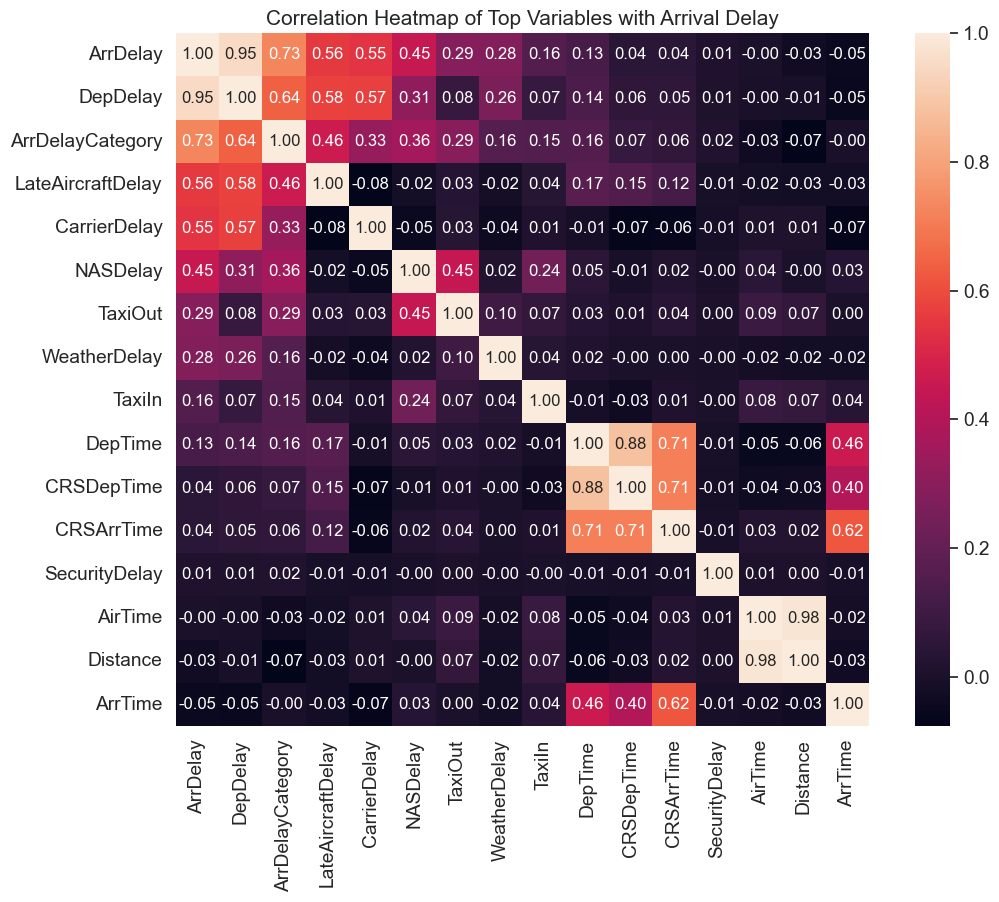

In [ ]:
# Fill NaN values with 0
aviation_merged_numeric = aviation_merged.select_dtypes(include=np.number).fillna(0)

# Calculate correlation matrix
delcorrmat = aviation_merged_numeric.corr()

k = 20  # number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(aviation_merged_numeric[cols].values.T)
sns.set(font_scale=1.25)

# Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Correlation Heatmap of Top Variables with Arrival Delay")
plt.show()


In [ ]:
aviation_merged_numeric = aviation_merged.select_dtypes(include=np.number).fillna(0)


In [24]:
# Fill NaN values with 0
aviation_merged_numeric = aviation_merged.select_dtypes(include=np.number).fillna(0)

sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(aviation_merged_numeric[cols], height = 2.5)
plt.show()

KeyboardInterrupt: 

In [28]:
aviation_merged_numeric = aviation_merged.select_dtypes(include=np.number).fillna(0)

aviation_merged_numeric.columns

import statsmodels.api as sm

# Assuming your DataFrame is named 'df'
# Select relevant independent variables
independent_vars = ['DepTime', 'CRSDepTime', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Add a constant term for the intercept
X = sm.add_constant(aviation_merged_numeric[independent_vars])

# Dependent variable
y = aviation_merged_numeric['ArrDelay']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.424e+07
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:58:14   Log-Likelihood:            -5.6826e+06
No. Observations:             1928371   AIC:                         1.137e+07
Df Residuals:                 1928358   BIC:                         1.137e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9034      0.01


The regression analysis on the airline dataset provides valuable insights into the factors influencing arrival delays. The highly significant coefficients for various features, such as departure time, airtime, departure delay, and delay categories (CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay), indicate their strong associations with arrival delays. Specifically, the negative coefficient for departure time suggests that earlier departures are associated with shorter arrival delays. Conversely, the positive coefficients for delay categories imply that delays caused by carriers, weather, National Airspace System (NAS), security, and late aircraft are positively correlated with overall arrival delays. The model exhibits a remarkable R-squared value of 0.993, indicating a robust fit to the data.